In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd

# Klastrowanie hierarchiczne

Porównanie rzóżnych podejśc do łączeni grup.

In [3]:
rnd.seed(123)
X = np.concatenate([rnd.multivariate_normal((0,0),np.array([[0.1,0],[0,10]]),30),
                    rnd.multivariate_normal((6,5),np.array([[10,0],[0,0.1]]),30),
                    rnd.multivariate_normal((8,-2),np.array([[1,0],[0,1]]),30)],axis=0)
y = np.repeat(range(3),30)

import seaborn as sns
colors = sns.color_palette("Set2", 20)

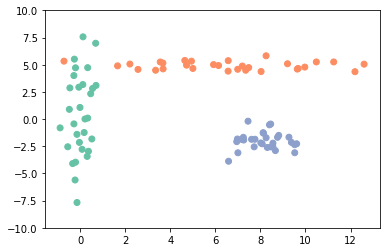

In [4]:
plt.scatter(X[:,0],X[:,1],c=np.array(colors)[y])
plt.ylim(-10,10)
plt.show()

In [5]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn import metrics

#  method='ward'

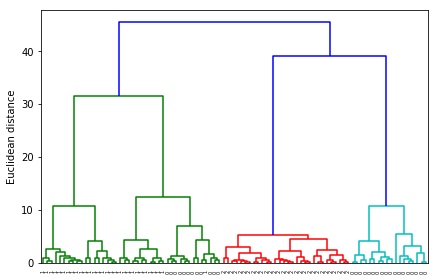

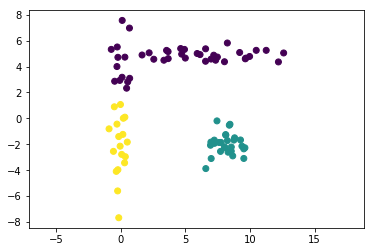

0.6817165847116674


In [6]:
df = pd.DataFrame(X, index=y)
df

   
row_clusters = linkage(pdist(df, metric='euclidean'), method='ward') 



row_dendr = dendrogram(row_clusters, 
                       labels=y)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()



part = fcluster(row_clusters, 3, 'maxclust')
plt.scatter(X[:, 0], X[:, 1], c = part)
plt.axis("equal")
plt.show()

print(metrics.adjusted_rand_score(y, part))

# method="average"

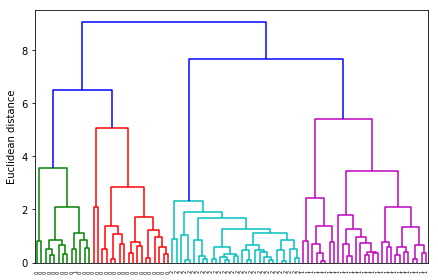

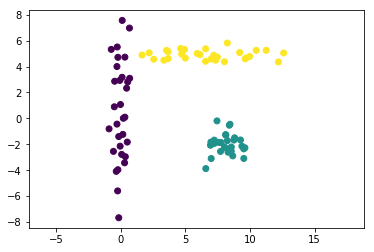

0.9664753465150577


In [7]:
df = pd.DataFrame(X, index=y)
df

   
row_clusters = linkage(pdist(df, metric='euclidean'), method='average') 



row_dendr = dendrogram(row_clusters, 
                       labels=y)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()



part = fcluster(row_clusters, 3, 'maxclust')
plt.scatter(X[:, 0], X[:, 1], c = part)
plt.axis("equal")
plt.show()

print(metrics.adjusted_rand_score(y, part))

# method="single"

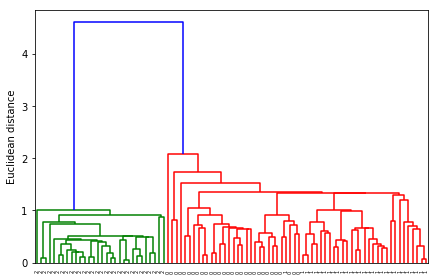

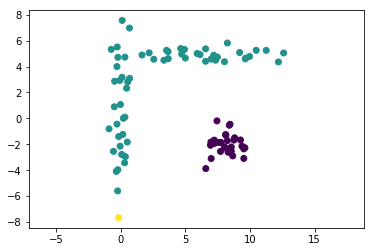

0.5619939672963962


In [8]:
df = pd.DataFrame(X, index=y)
df
   
row_clusters = linkage(pdist(df, metric='euclidean'), method='single') 



row_dendr = dendrogram(row_clusters, 
                       labels=y)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()



part = fcluster(row_clusters, 3, 'maxclust')
plt.scatter(X[:, 0], X[:, 1], c = part)
plt.axis("equal")
plt.show()

print(metrics.adjusted_rand_score(y, part))

# method="complete"

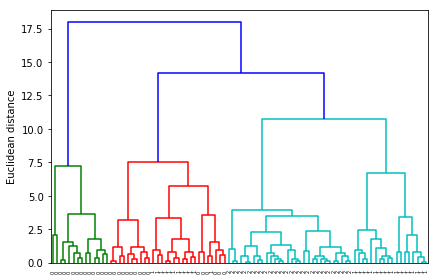

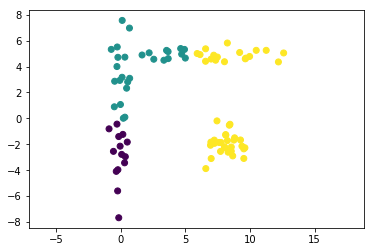

0.37031849902204617


In [9]:
df = pd.DataFrame(X, index=y)
df
   
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete') 
row_dendr = dendrogram(row_clusters, 
                       labels=y)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()



part = fcluster(row_clusters, 3, 'maxclust')
plt.scatter(X[:, 0], X[:, 1], c = part)
plt.axis("equal")
plt.show()

print(metrics.adjusted_rand_score(y, part))

# method = 'median' 

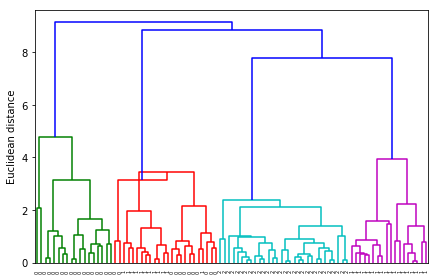

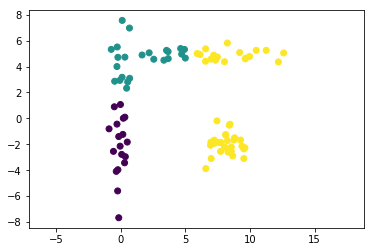

0.39588351215239764


In [10]:
df = pd.DataFrame(X, index=y)
df
   
row_clusters = linkage(pdist(df, metric='euclidean'), method='median') 
row_dendr = dendrogram(row_clusters, 
                       labels=y)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()



part = fcluster(row_clusters, 3, 'maxclust')
plt.scatter(X[:, 0], X[:, 1], c = part)
plt.axis("equal")
plt.show()

print(metrics.adjusted_rand_score(y, part))

# Różne odległości

In [11]:
import scipy.spatial.distance as dis

# euclidean

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.euclidean.html#scipy.spatial.distance.euclidean

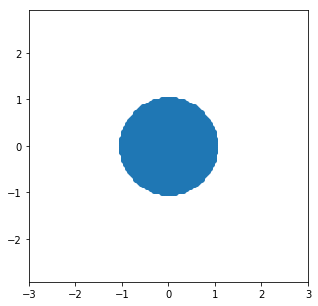

In [12]:
data = []
for i in np.linspace(-2.0, 2.0, num=100):
    for j in np.linspace(-2.0, 2.0, num=100):
        if( dis.euclidean([0,0],[i,j]) < 1 ):
            data.append( [i,j] )
data = np.array(data)   

plt.figure(figsize=(5,5));
plt.scatter(data[:,0], data[:,1])
plt.axis("equal")
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

# cityblock

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cityblock.html#scipy.spatial.distance.cityblock

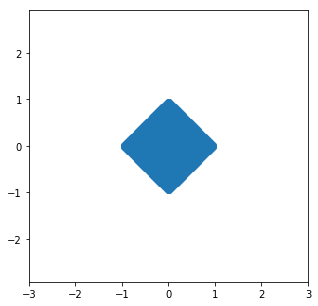

In [13]:
data = []
for i in np.linspace(-2.0, 2.0, num=100):
    for j in np.linspace(-2.0, 2.0, num=100):
        if( dis.cityblock([0,0],[i,j]) < 1 ): ########### zmien p = 1,2,3
            data.append( [i,j] )
data = np.array(data)   

plt.figure(figsize=(5,5));
plt.scatter(data[:,0], data[:,1])
plt.axis("equal")
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

# minkowski

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.minkowski.html#scipy.spatial.distance.minkowski

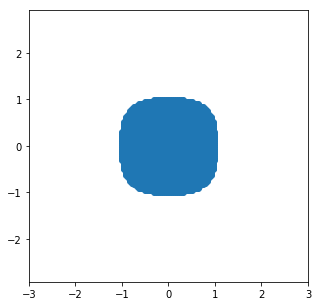

In [14]:
data = []
for i in np.linspace(-2.0, 2.0, num=100):
    for j in np.linspace(-2.0, 2.0, num=100):
        if( dis.minkowski([0,0],[i,j], p=3 ) < 1 ): ########### zmien p = 1,2,3
            data.append( [i,j] )
data = np.array(data)   

plt.figure(figsize=(5,5));
plt.scatter(data[:,0], data[:,1])
plt.axis("equal")
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

# mahalanobis

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.mahalanobis.html#scipy.spatial.distance.mahalanobis

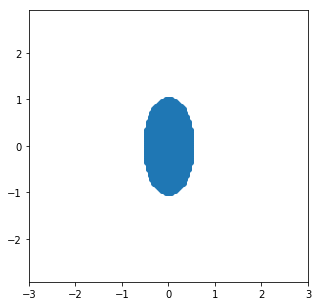

In [15]:
data = []
for i in np.linspace(-2.0, 2.0, num=100):
    for j in np.linspace(-2.0, 2.0, num=100):
        if( dis.mahalanobis([0,0],[i,j], [[4,0],[0,1]] ) < 1 ):
            data.append( [i,j] )
data = np.array(data)   

plt.figure(figsize=(5,5));
plt.scatter(data[:,0], data[:,1])
plt.axis("equal")
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

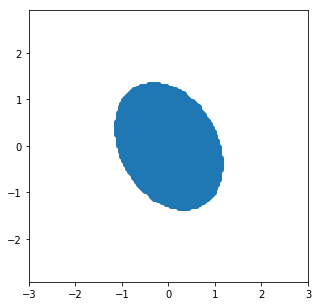

In [16]:
theta = np.pi/3
V = np.linalg.inv(
    np.dot(np.dot(np.transpose([[np.cos(theta),-np.sin(theta)],[  np.sin(theta),np.cos(theta)]]) , [[2,0],[0,1]]),
           [[np.cos(theta),-np.sin(theta)],[  np.sin(theta),np.cos(theta)]] 
))

# http://www.visiondummy.com/2014/04/geometric-interpretation-covariance-matrix/

data = []
for i in np.linspace(-2.0, 2.0, num=100):
    for j in np.linspace(-2.0, 2.0, num=100):
        if( dis.mahalanobis([0,0],[i,j], V ) < 1 ):
            data.append( [i,j] )
data = np.array(data)   

plt.figure(figsize=(5,5));
plt.scatter(data[:,0], data[:,1])
plt.axis("equal")
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()


# cosine

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html#scipy.spatial.distance.cosine

https://en.wikipedia.org/wiki/Cosine_similarity

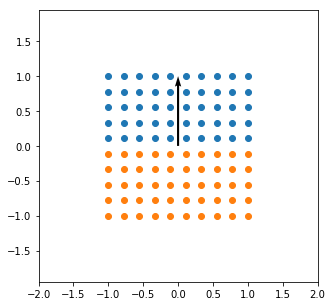

In [17]:
data = []
data1 = []
for i in np.linspace(-1., 1.0, num=10):
    for j in np.linspace(-1., 1.0, num=10):
        if( dis.cosine([0,1],[i,j]) < 1 ):
            data.append( [i,j] )
#         print(dis.cosine([0.1,0.1],[i,j]))
        else:
            data1.append( [i,j] )
#             print(1)
data = np.array(data)   
data1 = np.array(data1)   

plt.figure(figsize=(5,5));
plt.scatter(data[:,0], data[:,1])
plt.scatter(data1[:,0], data1[:,1])
V = np.array([[0,1]])
origin = [0], [0] # origin point

plt.quiver(*origin, V[:,0], V[:,1], angles='xy', scale_units='xy', scale=1)
plt.axis("equal")
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()

# Zad.

Zgadnij, która miara zadziała najlepiej

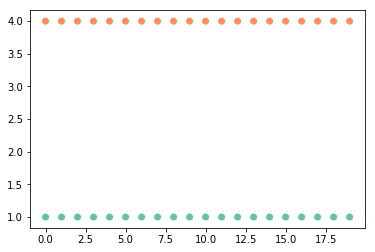

In [18]:
X= np.vstack([np.tile(range(20),2),np.repeat(np.array([1,4]),20)]).T
y = np.hstack((np.repeat(0,20),np.repeat(1,20)))
plt.scatter(X[:,0],X[:,1],c=np.array(colors)[y])
plt.show()

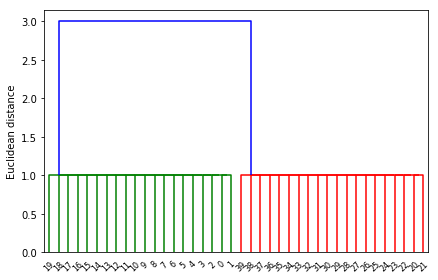

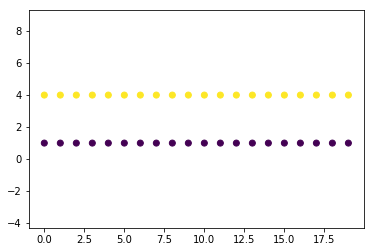

1.0


In [19]:
df = pd.DataFrame(X)
df
   
row_clusters = linkage(pdist(df, metric='euclidean'), method='single') 



row_dendr = dendrogram(row_clusters)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()



part = fcluster(row_clusters, 3, 'maxclust')
plt.scatter(X[:, 0], X[:, 1], c = part)
plt.axis("equal")
plt.show()

print(metrics.adjusted_rand_score(y, part))

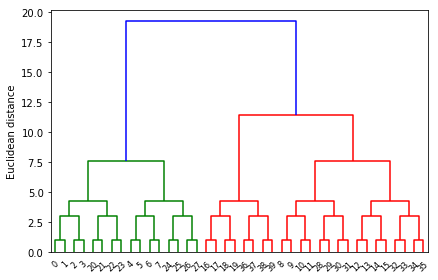

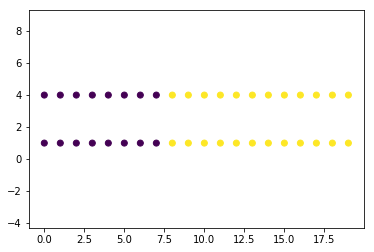

-0.025236593059936967


In [20]:
df = pd.DataFrame(X)
df
   
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete') 
row_dendr = dendrogram(row_clusters)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()



part = fcluster(row_clusters, 2, 'maxclust')
plt.scatter(X[:, 0], X[:, 1], c = part)
plt.axis("equal")
plt.show()

print(metrics.adjusted_rand_score(y, part))

# Zad.

Zgadnij, która miara zadziała najlepiej

In [21]:
X = np.loadtxt("./data_cl/flame_data.txt")
y = np.loadtxt("./data_cl/flame_label.txt").astype(int)
print(X.shape)
print(np.unique(y))

(240, 2)
[0 1]


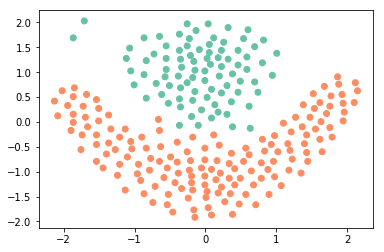

In [22]:
plt.scatter(X[:,0],X[:,1],c=np.array(colors)[y])
plt.show()

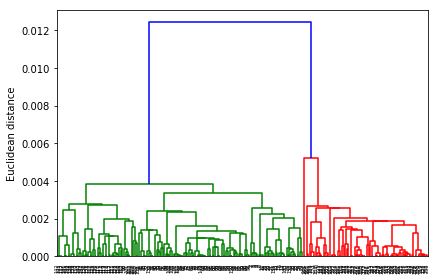

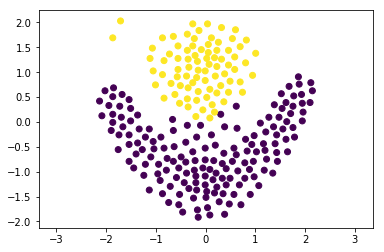

0.9013709892780234


In [23]:
df = pd.DataFrame(X)
df
   
row_clusters = linkage(pdist(df, metric='cosine'), method='single') 
row_dendr = dendrogram(row_clusters)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()



part = fcluster(row_clusters, 2, 'maxclust')
plt.scatter(X[:, 0], X[:, 1], c = part)
plt.axis("equal")
plt.show()

print(metrics.adjusted_rand_score(y, part))

# Zad.

Zgadnij, która miara zadziała najlepiej

In [24]:
X = np.loadtxt("./data_cl/pathbased_data.txt")
y = np.loadtxt("./data_cl/pathbased_label.txt").astype(int)
print(X.shape)
print(np.unique(y))

(300, 2)
[0 1 2]


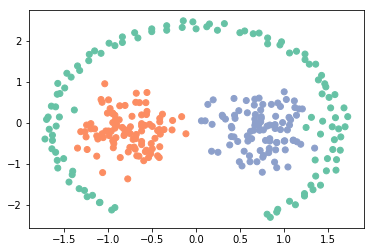

In [25]:
plt.scatter(X[:,0],X[:,1],c=np.array(colors)[y])
plt.show()

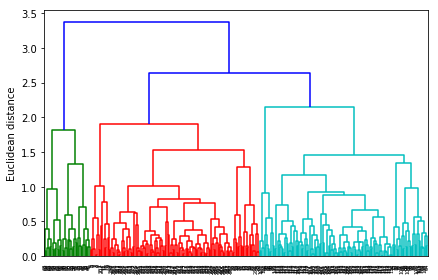

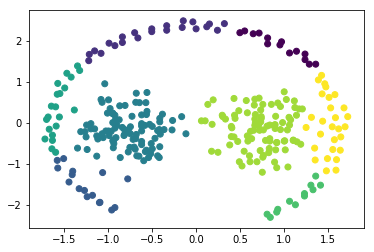

0.7090249703529886


In [29]:
df = pd.DataFrame(X)
df
   
row_clusters = linkage(pdist(df, metric='cityblock'), method='average')
row_dendr = dendrogram(row_clusters)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()



part = fcluster(row_clusters, 8, 'maxclust')
plt.scatter(X[:, 0], X[:, 1], c = part)
plt.show()

print(metrics.adjusted_rand_score(y, part))

# Zad.

Zgadnij, która miara zadziała najlepiej

In [30]:
X = np.loadtxt("./data_cl/jain_data.txt")
y = np.loadtxt("./data_cl/jain_label.txt").astype(int)
print(X.shape)
print(np.unique(y))

(373, 2)
[0 1]


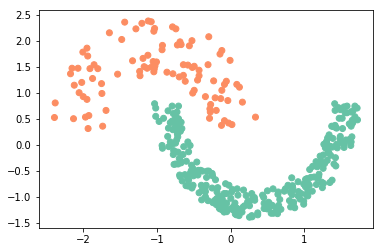

In [31]:
plt.scatter(X[:,0],X[:,1],c=np.array(colors)[y])
plt.show()

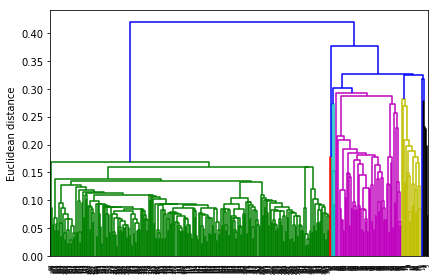

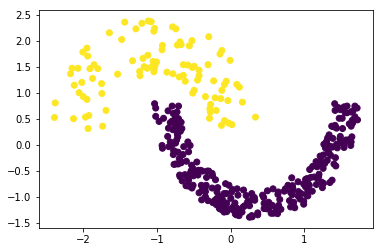

1.0


In [33]:
df = pd.DataFrame(X)
df
   
row_clusters = linkage(pdist(df, metric='mahalanobis'), method='single') 
row_dendr = dendrogram(row_clusters)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()



part = fcluster(row_clusters, 2, 'maxclust')
plt.scatter(X[:, 0], X[:, 1], c = part)
plt.show()

print(metrics.adjusted_rand_score(y, part))

# Zad.

Zgadnij, która miara zadziała najlepiej

In [34]:
X = np.loadtxt("./data_cl/Compound_data.txt")
y = np.loadtxt("./data_cl/Compound_label.txt").astype(int)
print(X.shape)
print(np.unique(y))

(399, 2)
[0 1 2 3 4 5]


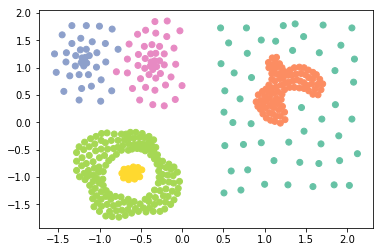

In [35]:
plt.scatter(X[:,0],X[:,1],c=np.array(colors)[y])
plt.show()

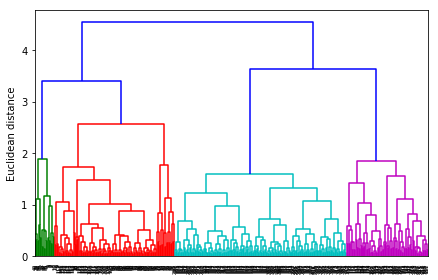

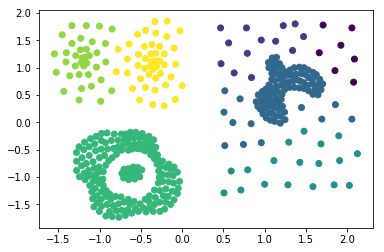

0.8506113500880919


In [40]:
df = pd.DataFrame(X)
df
   
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete') 
row_dendr = dendrogram(row_clusters)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()



part = fcluster(row_clusters, 7, 'maxclust')
plt.scatter(X[:, 0], X[:, 1], c = part)
plt.show()

print(metrics.adjusted_rand_score(y, part))

# Zad.

Zgadnij, która miara zadziała najlepiej

In [120]:
X = np.loadtxt("./data_cl/spiral_data.txt")
y = np.loadtxt("./data_cl/spiral_label.txt").astype(int)
print(X.shape)
print(np.unique(y))

(312, 2)
[0 1 2]


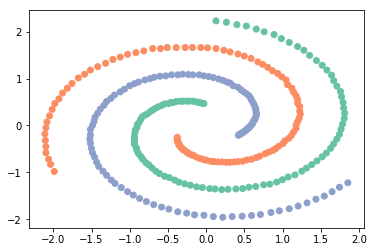

In [121]:
plt.scatter(X[:,0],X[:,1],c=np.array(colors)[y])
plt.show()

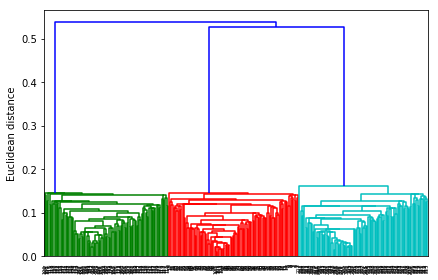

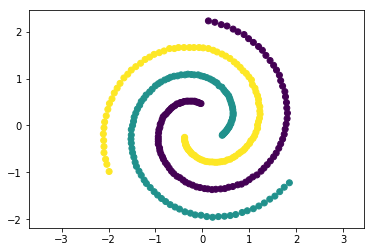

1.0


In [122]:
df = pd.DataFrame(X)
df
   
row_clusters = linkage(pdist(df, metric='euclidean'), method='single') 



row_dendr = dendrogram(row_clusters)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()



part = fcluster(row_clusters, 3, 'maxclust')
plt.scatter(X[:, 0], X[:, 1], c = part)
plt.axis("equal")
plt.show()

print(metrics.adjusted_rand_score(y, part))